# 📝 Exercise M7.01

In this exercise we will define dummy classification baselines and use them as
reference to assess the relative predictive performance of a given model of
interest.

We illustrate those baselines with the help of the Adult Census dataset, using
only the numerical features for the sake of simplicity.

In [42]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [43]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)


Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(
    StandardScaler(), LogisticRegression()
)


Compute the cross-validation (test) scores for the classifier on this dataset.
Store the results pandas Series as we did in the previous notebook.

In [45]:
cv_results = cross_validate(
    pipeline,
    data,
    target,
    cv=cv
)

errors_logistic_regressor = pd.Series(
    cv_results["test_score"], name="Logistic regressor"
)


Now, compute the cross-validation scores of a dummy classifier that constantly
predicts the most frequent class observed the training set. Please refer to
the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [46]:
dummy = DummyClassifier(strategy="uniform") # simple baseline to compare with other models

cv_results_dummy = cross_validate(
    dummy,
    data,
    target,
    cv=cv
)

errors_dummy_classifier = pd.Series(
    cv_results_dummy["test_score"], name="Dummy classifier"
)


Now that we collected the results from the baseline and the model, concatenate
the test scores as columns a single pandas dataframe.

In [47]:
results_errors =  pd.concat([errors_dummy_classifier, errors_logistic_regressor], axis=1)

In [48]:
results_errors

Dummy classifier  Logistic regressor
0          0.503419            0.815937
1          0.499038            0.813849
2          0.496786            0.815036
3          0.501781            0.815569
4          0.497727            0.810982
5          0.501208            0.814831
6          0.504074            0.813112
7          0.497645            0.810368
8          0.503296            0.812375
9          0.500471            0.816306


Next, plot the histogram of the cross-validation test scores for both models
with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

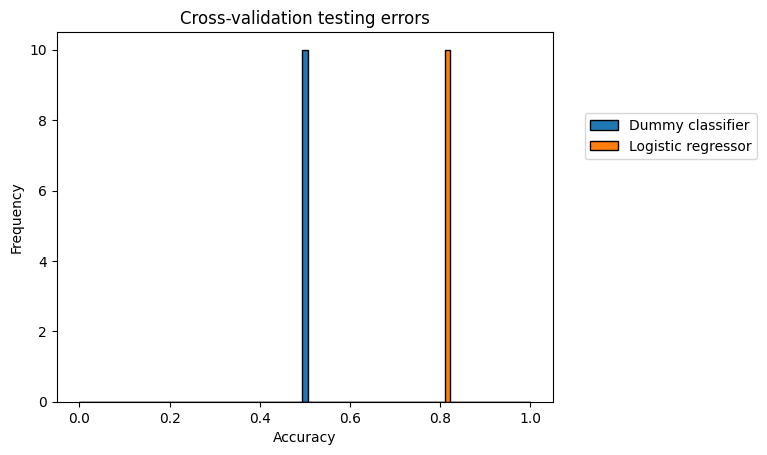

In [49]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(start=0, stop=1, num=80)
results_errors.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy")
_ = plt.title("Cross-validation testing errors")

Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.